<a href="https://colab.research.google.com/github/Mallikarjun1235/NLP1/blob/main/TextClassificationSpacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connecting Google Colab with your Google Drive

## Text Classification

* Text Classification is an automated process of classification of text into pre-defined categories. We can classify emails into spam or non-spam, news articles into different categories like Politics, Technology, Sports, etc.

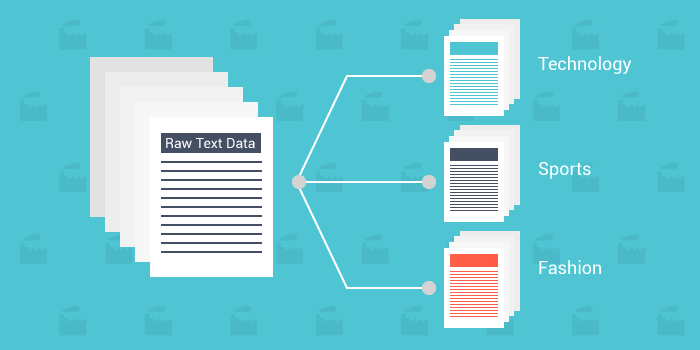

In [ ]:
from IPython.display import Image
Image("./img/text_img.png")

#### Loading required libraries

In [ ]:
import pandas as pd
import numpy as np

import spacy
nlp = spacy.load('en_core_web_sm')

from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes, svm
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

#### SMS Spam Collection Dataset

__Context:__

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,572 messages, tagged as "ham" (legitimate) or "spam".

__Content:__

The file 'SMSSpamCollection.csv' contains one message per line. Each line is composed of two columns: column1 contains the label (ham or spam) and column2 contains the raw text.

In [ ]:
pd.set_option('display.max_colwidth', 200)

#### Reading the dataset

In [ ]:
corpus = pd.read_csv("SMSSpamCollection.csv", delimiter="\t", encoding='utf-8', header=None)

In [ ]:
corpus.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


# check for the data imbalance

In [ ]:
corpus.columns = ['target', 'SMS']

In [ ]:
corpus.head()

,target,SMS
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
corpus.target.value_counts(True)*100

ham     86.593683
spam    13.406317
Name: target, dtype: float64

We have data imbalance. 86% of the SMSs are not spam. So possible metric is recall.

## Text preprocessing
- Tokenization
- Remove stopwords
- convert tokens to lemmas

### Tokenization

In [ ]:
string = 'We have data imbalance. 86% of the SMSs are not spam. So possible metric is recall having said that it is imbalanced problem. lives spamming'

In [ ]:
doc = nlp(string)

In [ ]:
tokens = [token.text for token in doc]

In [ ]:
tokens = [token.lower() for token in tokens]

In [ ]:
stop_words = list(STOP_WORDS)

In [ ]:
tokens = [token for token in tokens if token not in stop_words]

In [ ]:
tokens_string = ' '.join(tokens)

In [ ]:
doc1 = nlp(tokens_string)

In [ ]:
lemmas = [token.lemma_ for token in doc1 if token.is_alpha == True]

In [ ]:
lemmas

In [ ]:
def get_lemmas_from_string(string):
  doc = nlp(string)
  tokens = [token.text for token in doc] ## creates tokens for the string
  tokens = [token.lower() for token in tokens] ## removes upper case
  stop_words = list(STOP_WORDS) ##  get stop_words
  tokens = [token for token in tokens if token not in stop_words] ## removes stopwords from the string
  tokens_string = ' '.join(tokens) ## joins the tokens
  doc1 = nlp(tokens_string)
  lemmas = [token.lemma_ for token in doc1 if token.is_alpha == True] ## removes periods and gets the lemmas
  lemmas_string = ' '.join(lemmas) ## lemmas_string
  return lemmas_string

In [ ]:
corpus['SMS Lemma'] = corpus['SMS'].apply(get_lemmas_from_string)

In [ ]:
corpus.head()

,target,SMS,SMS Lemma
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",jurong point crazy available bugis n great world la e buffet cine get amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry wkly comp win fa cup final tkts text fa receive entry txt apply
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah think go usf live


In [ ]:
text = 'u c iam'

In [ ]:
def remove_single_letter(text):
  test = text.split()
  final = [word for word in test if len(word)>1]
  final_text = ' '.join(final)
  return final_text

In [ ]:
remove_single_letter(text)

'iam'

In [ ]:
corpus['SMS_final'] = corpus['SMS Lemma'].apply(remove_single_letter)

In [ ]:
corpus.head()

,target,SMS,SMS Lemma,SMS_final
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",jurong point crazy available bugis n great world la e buffet cine get amore wat,jurong point crazy available bugis great world la buffet cine get amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry wkly comp win fa cup final tkts text fa receive entry txt apply,free entry wkly comp win fa cup final tkts text fa receive entry txt apply
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,dun early hor
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah think go usf live,nah think go usf live


In [ ]:
train_data = corpus[['target','SMS_final']]

In [ ]:
train_data.head()

,target,SMS_final
0,ham,jurong point crazy available bugis great world la buffet cine get amore wat
1,ham,ok lar joke wif oni
2,spam,free entry wkly comp win fa cup final tkts text fa receive entry txt apply
3,ham,dun early hor
4,ham,nah think go usf live


In [ ]:
X = train_data['SMS_final']
y = train_data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)


In [ ]:
stop_words = list(stop_words) + ['aa','aah','da','lar','ok']

In [ ]:
tf_idf = TfidfVectorizer(stop_words=stop_words, max_df = 0.8)

In [ ]:
tf_idf.fit(X_train)

TfidfVectorizer(max_df=0.8,
                stop_words=['up', 'side', '‘d', 'fifteen', 'mostly', 'hereupon',
                            'its', 'they', 'yourselves', 'before', 'due', 'us',
                            "'d", 'n’t', 'therefore', 'nine', 'upon', 'whole',
                            'alone', 'thence', 'otherwise', 'only', 'show',
                            'it', 'once', 'becomes', 'own', 'namely', 'eight',
                            'on', ...])

In [ ]:
X_train_df = tf_idf.transform(X_train)
X_test_df = tf_idf.transform(X_test)

In [ ]:
X_train_df = X_train_df.todense()
X_test_df = X_test_df.todense()

In [ ]:
X_train_df = pd.DataFrame(X_train_df,columns = tf_idf.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_df, columns = tf_idf.get_feature_names_out())

In [ ]:
y_train = y_train.astype('category')
y_test = y_test.astype('category')

In [ ]:
X_train_df.head()

,aaooooright,aathi,ab,abdoman,abel,aberdeen,abi,ability,abiola,abj,...,yup,zac,zaher,ze,zero,zhong,zindgi,zoe,zogtorius,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model building

In [ ]:
from sklearn import naive_bayes, svm

In [ ]:
nb = naive_bayes.MultinomialNB()

In [ ]:
nb.fit(X_train_df, y_train)

MultinomialNB()

In [ ]:
y_train_pred = nb.predict(X_train_df)

In [ ]:
y_test_pred = nb.predict(X_test_df)

In [ ]:
recall = recall_score(y_test, y_test_pred, pos_label='spam')

In [ ]:
recall

0.7434782608695653

In [ ]:
precision = precision_score(y_test, y_test_pred, pos_label='spam')

In [ ]:
precision

0.9941860465116279

# Regular expressions